In [1]:
import numpy as np
from tqdm import tqdm
from pathlib import Path
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] #中文字體

In [2]:
original_data = Path(r'..\dataset\_original')
dirs = [_dir.name for _dir in original_data.iterdir()][1:]
print(dirs)

['mesa', 'MrOS_visit1', 'MrOS_visit2', 'shhs1', 'shhs2', '耕莘dataset']


In [3]:
def check_value(signal, Min, Max):
    _min, _max = signal.min(), signal.max()
    if _min < Min: 
        Min = _min
    elif _max > Max:
        Max = _max
    return Min, Max

def check_length(signal):
    length = len(signal)
    hr = length//3600
    if hr > 12:
        hr = 12
    return hr

def check_AHI(AHI):
    ahi = int(AHI)
    if ahi > 100:
        ahi = 100
    return ahi

In [4]:
def summary_len(numbers, x_start=0):
    plt.figure(figsize=(10, 5))
    width = 0.15
    
    for i in range(len(dirs)):
        x_value = [x+x_start for x in range(len(numbers[i]))]
        plt.bar([x+i*width for x in x_value], numbers[i], width=width)
        xticks_label = [f'{x}~{x+1}' for x in x_value[:-1]]+[f'{x_value[-1]}~']
        plt.xticks([x+2*width for x in x_value], xticks_label)
        
    plt.xlabel('Length (hr)')
    plt.ylabel('Numbers')
    plt.legend(dirs)
    plt.tight_layout()
    plt.show()
    
def summary_AHI(numbers):
    plt.figure(figsize=(10, 5))
    width = 0.12
    
    for i in range(2):
        plt.subplot(1, 2, i+1)
        for j in range(len(dirs)):  
            new_numbers = []
            if i == 0:
                new_numbers.append(sum(numbers[j][:5]))
                new_numbers.append(sum(numbers[j][5:15]))
                new_numbers.append(sum(numbers[j][15:30]))
                new_numbers.append(sum(numbers[j][30:50]))
            else:
                new_numbers.append(sum(numbers[j][50:60]))
                new_numbers.append(sum(numbers[j][60:70]))
                new_numbers.append(sum(numbers[j][70:80]))
                new_numbers.append(sum(numbers[j][80:90]))
                new_numbers.append(sum(numbers[j][90:100]))
                new_numbers.append(numbers[j][100])
                
            x_value = list(range(len(new_numbers)))
            plt.bar([x+j*width for x in x_value], new_numbers, width=width)
            if i == 0:
                xticks_label = ['0~5', '5~15', '15~30', '30~50']
            else:
                xticks_label = ['50~60', '60~70', '70~80', '80~90', '90~100', '100~']
            plt.xticks([x+2.5*width for x in x_value], xticks_label)
        
        plt.xlabel('AHI')
        plt.ylabel('Numbers')
        plt.legend(dirs)
    plt.tight_layout()
    plt.show()

mesa: 100%|██████████████████████████████████████████████████████████████████████| 2056/2056 [00:01<00:00, 1158.38it/s]


value [min, max]: [0.0, 100.0], AHI max: 111.2849162
length [0 ~ 12hr]: [0, 0, 0, 0, 0, 1, 5, 9, 374, 638, 338, 501, 190]
AHI [5, 15, 30, 50, 70, 100, 100~]: [414, 643, 518, 292, 132, 53, 4]


MrOS_visit1: 100%|████████████████████████████████████████████████████████████████| 2906/2906 [00:21<00:00, 133.49it/s]


value [min, max]: [0.0, 100.0], AHI max: 104.0
length [0 ~ 12hr]: [0, 0, 0, 0, 4, 9, 16, 69, 246, 512, 674, 681, 695]
AHI [5, 15, 30, 50, 70, 100, 100~]: [502, 1029, 792, 416, 135, 31, 1]


MrOS_visit2: 100%|████████████████████████████████████████████████████████████████| 1026/1026 [00:07<00:00, 139.80it/s]


value [min, max]: [0.0, 100.0], AHI max: 91.0
length [0 ~ 12hr]: [0, 0, 0, 0, 0, 0, 1, 0, 14, 78, 187, 161, 585]
AHI [5, 15, 30, 50, 70, 100, 100~]: [154, 360, 283, 158, 56, 15, 0]


shhs1: 100%|██████████████████████████████████████████████████████████████████████| 5793/5793 [00:41<00:00, 140.59it/s]


value [min, max]: [0.0, 100.0], AHI max: 161.8401937
length [0 ~ 12hr]: [0, 0, 0, 1, 5, 31, 255, 1155, 4083, 263, 0, 0, 0]
AHI [5, 15, 30, 50, 70, 100, 100~]: [1766, 2031, 1237, 512, 184, 54, 9]


shhs2: 100%|██████████████████████████████████████████████████████████████████████| 2651/2651 [00:18<00:00, 145.38it/s]


value [min, max]: [0.0, 100.0], AHI max: 117.6
length [0 ~ 12hr]: [0, 0, 0, 0, 2, 1, 6, 70, 319, 749, 807, 613, 84]
AHI [5, 15, 30, 50, 70, 100, 100~]: [629, 960, 637, 292, 96, 35, 2]


耕莘dataset: 100%|██████████████████████████████████████████████████████████████████| 345/345 [00:03<00:00, 101.03it/s]


value [min, max]: [0.0, 100.0], AHI max: 127.9
length [0 ~ 12hr]: [0, 1, 1, 0, 1, 5, 216, 114, 6, 1, 0, 0, 0]
AHI [5, 15, 30, 50, 70, 100, 100~]: [45, 77, 61, 73, 40, 38, 11]


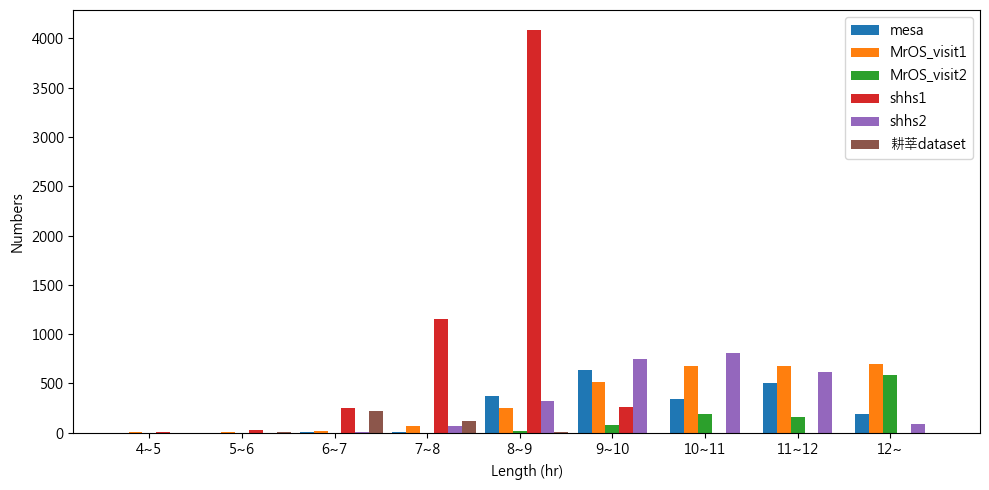

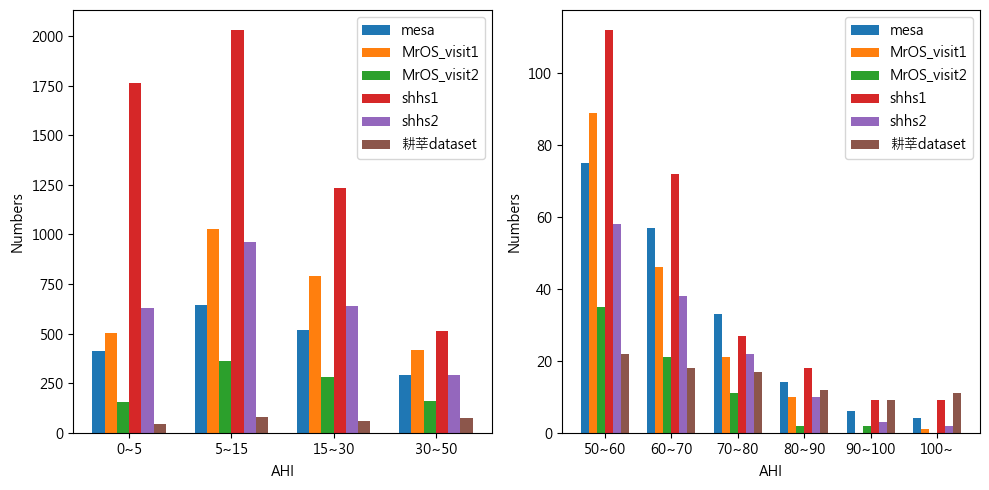

In [11]:
# original data
len_list = []
ahi_list = []

for _dir in dirs:
    v_min, v_max = 0., 0.
    ahi_max = 0.
    length = [0 for i in range(13)]
    AHI = [0 for i in range(101)]
    
    files = [file for file in (original_data/_dir).glob('*.npz')]
    for file in tqdm(files, desc=f'{_dir}'):
        file = str(file)
        data = np.load(file, allow_pickle=True)
        signal = data['SpO2']
        
        if 'mros' in file:
            ahi = float(data['csv_data'].item()['poahi3'])
        elif '耕莘' in file:
            ahi = float(data['AHI'])
        else:
            ahi = float(data['csv_data'].item()['ahi_a0h3'])
        
        v_min, v_max = check_value(signal, v_min, v_max)
        if ahi > ahi_max:
            ahi_max = ahi
        length[check_length(signal)] += 1
        AHI[check_AHI(ahi)] += 1

    print(f'value [min, max]: [{v_min}, {v_max}], AHI max: {ahi_max}')
    print(f'length [0 ~ 12hr]: {length}')
    AHI_temp = [sum(AHI[:5]), sum(AHI[5:15]), sum(AHI[15:30]), 
                sum(AHI[30:50]), sum(AHI[50:70]), sum(AHI[70:100]), AHI[100]]    
    print(f'AHI [5, 15, 30, 50, 70, 100, 100~]: {AHI_temp}')
    len_list.append(length[4:])
    ahi_list.append(AHI)
    
summary_len(len_list, 4)
summary_AHI(ahi_list)

In [7]:
del_wake_data = Path(r'..\dataset\del_wake')
dirs = [_dir.name for _dir in original_data.iterdir()][1:-1]
print(dirs)

['mesa', 'MrOS_visit1', 'MrOS_visit2', 'shhs1', 'shhs2']


mesa: 100%|███████████████████████████████████████████████████████████████████████| 2056/2056 [00:11<00:00, 179.04it/s]


value [min, max]: [0.0, 100.0]
length [0 ~ 12hr]: [0, 2, 3, 33, 74, 137, 355, 638, 508, 228, 64, 13, 1]


MrOS_visit1: 100%|████████████████████████████████████████████████████████████████| 2906/2906 [00:16<00:00, 172.73it/s]


value [min, max]: [0.0, 100.0]
length [0 ~ 12hr]: [0, 2, 7, 9, 49, 122, 467, 951, 743, 371, 128, 43, 14]


MrOS_visit2: 100%|████████████████████████████████████████████████████████████████| 1026/1026 [00:05<00:00, 181.46it/s]


value [min, max]: [0.0, 100.0]
length [0 ~ 12hr]: [0, 0, 4, 4, 18, 52, 167, 296, 283, 119, 48, 27, 8]


shhs1: 100%|██████████████████████████████████████████████████████████████████████| 5793/5793 [00:33<00:00, 174.92it/s]


value [min, max]: [0.0, 100.0]
length [0 ~ 12hr]: [1, 2, 5, 48, 197, 589, 1665, 2356, 926, 4, 0, 0, 0]


shhs2: 100%|██████████████████████████████████████████████████████████████████████| 2651/2651 [00:12<00:00, 208.87it/s]


value [min, max]: [0.0, 100.0]
length [0 ~ 12hr]: [0, 1, 3, 6, 45, 160, 524, 956, 677, 233, 46, 0, 0]


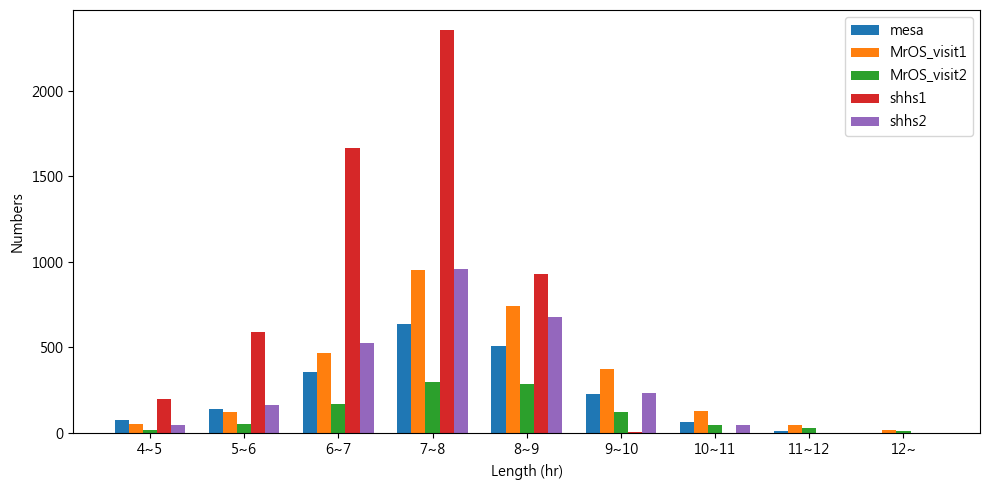

In [8]:
# delete wake data
len_list = []

for _dir in dirs:
    v_min, v_max = 0., 0.
    length = [0 for i in range(13)]
    
    files = [file for file in (del_wake_data/_dir).glob('*.npz')]
    for file in tqdm(files, desc=f'{_dir}'):
        data = np.load(file, allow_pickle=True)
        signal = data['SpO2']
        
        v_min, v_max = check_value(signal, v_min, v_max)
        length[check_length(signal)] += 1
        
    print(f'value [min, max]: [{v_min}, {v_max}]')
    print(f'length [0 ~ 12hr]: {length}')
    len_list.append(length[4:])
    
summary_len(len_list, 4)